<a href="https://colab.research.google.com/github/muhammadrizwan11/RF-DETR-Real-Time-Object-Detection-Transformer/blob/main/RF_DETR_Real_Time_Object_Detection_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 🚀 RF-DETR: Real-Time Object Detection Transformer

### 🌟 Key Highlights

RF-DETR is a cutting-edge object detection transformer-based architecture with remarkable versatility:

- **Universal Domain Adaptation**: Transfers effectively across diverse datasets of varying sizes
- **Benchmark Performance**:
  - First real-time model to exceed **60 AP** on Microsoft COCO benchmark
  - State-of-the-art results on **RF100-VL** domain adaptability benchmark

### 🔍 Design Philosophy

Developed for high-speed, high-accuracy object detection, particularly suited for:
- Edge computing
- Low-latency applications
- Limited computational resources

### 🛠 Model Variants

| Variant | Parameters |
|---------|------------|
| RF-DETR Base | 29M |
| RF-DETR Large | 129M |

###  License
🔓 **Apache 2.0** - Open and free for use


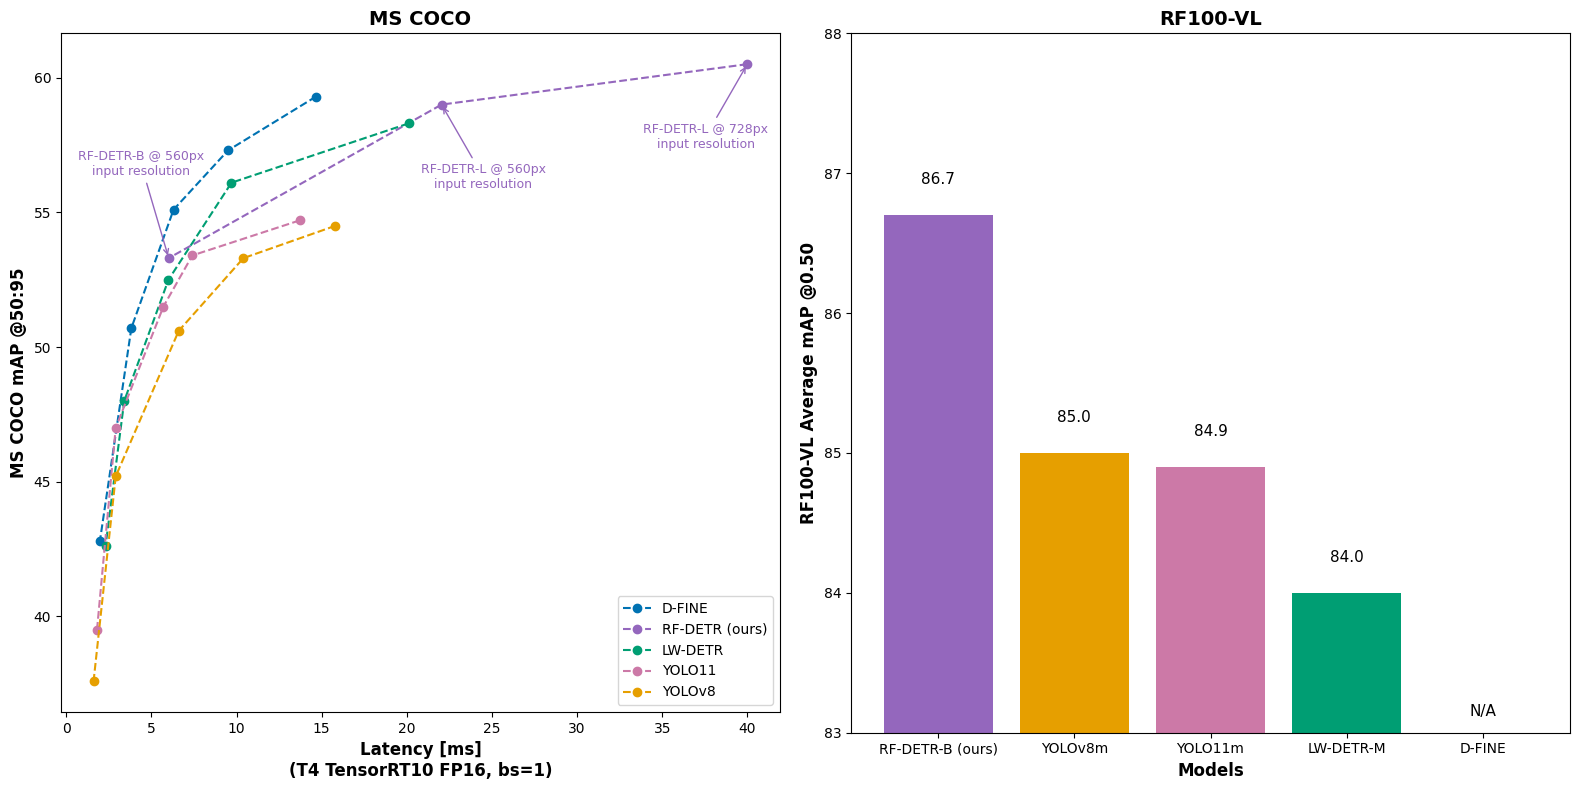

# Running RF-DETR
You can run RF-DETR on COCO using the rfdetr  Python package:



In [1]:
!pip install rfdetr supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 17.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached ninja-1.11.1.4-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.0/122.0 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:

In [10]:
# Import required libraries
import io
import requests
import supervision as sv
from PIL import Image
from rfdetr.util.coco_classes import COCO_CLASSES


In [3]:
# 🚀 Load the RF-DETR Base Model
from rfdetr import RFDETRBase
model = RFDETRBase()

Installing onnxruntime by `/usr/bin/python3 -m pip install onnxruntime`, please wait for a moment..

rf-detr-base.pth: 100%|██████████| 355M/355M [00:16<00:00, 22.0MiB/s]
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/88.2M [00:00<?, ?B/s]

Loading pretrain weights


In [4]:
# 🖼️ Download Sample Image
def download_image(url):
    """
    Download an image from a given URL.

    Args:
        url (str): URL of the image to download

    Returns:
        PIL.Image: Downloaded image
    """
    response = requests.get(url)
    return Image.open(io.BytesIO(response.content))

In [5]:
# Sample image URL (dog image)
url = "https://media.roboflow.com/notebooks/examples/dog-2.jpeg"
image = download_image(url)

In [6]:
# 🔍 Perform Object Detection
# Detect objects with a confidence threshold of 0.5
detections = model.predict(image, threshold=0.5)

In [11]:
detections = model.predict(image, threshold=0.5)

color = sv.ColorPalette.from_hex([
    "#ffff00", "#ff9b00", "#ff8080", "#ff66b2", "#ff66ff", "#b266ff",
    "#9999ff", "#3399ff", "#66ffff", "#33ff99", "#66ff66", "#99ff00"
])
text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)

bbox_annotator = sv.BoxAnnotator(color=color, thickness=thickness)
label_annotator = sv.LabelAnnotator(
    color=color,
    text_color=sv.Color.BLACK,
    text_scale=text_scale,
    smart_position=True
)

labels = [
    f"{COCO_CLASSES[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]


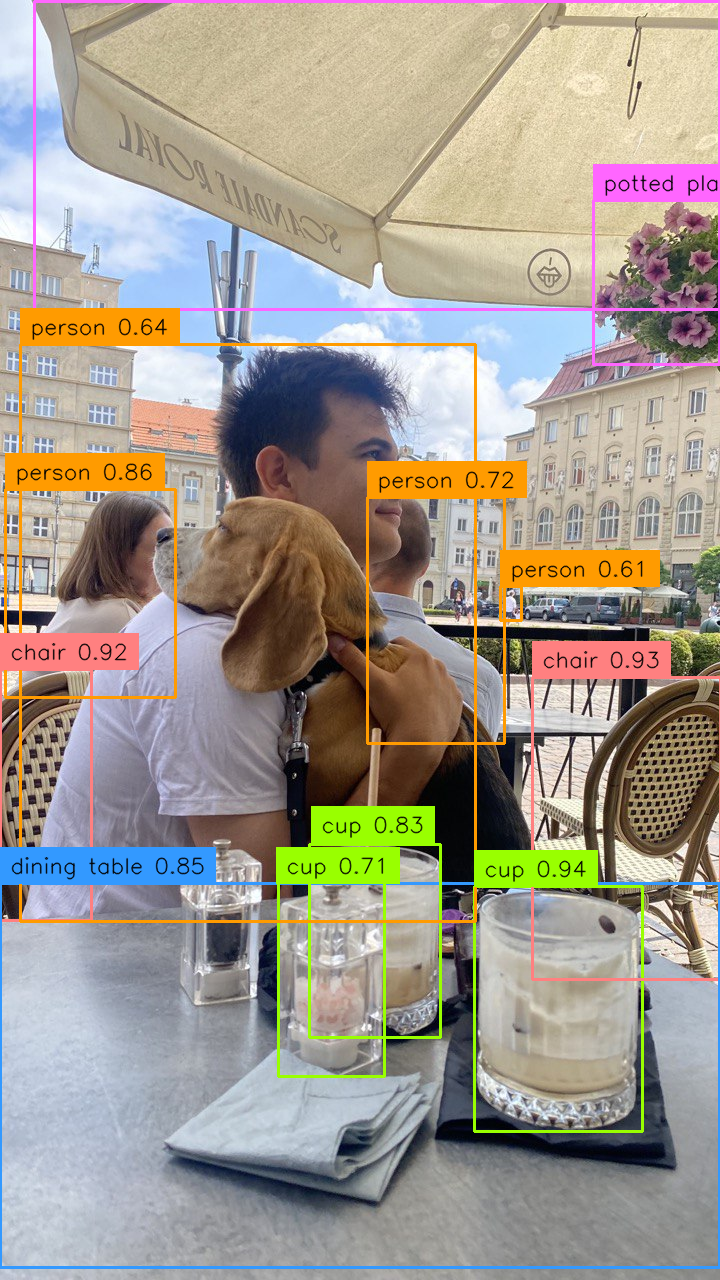

In [12]:

# Annotate bounding boxes
annotated_image = image.copy()
annotated_image = bbox_annotator.annotate(annotated_image, detections)
annotated_image = label_annotator.annotate(annotated_image, detections, labels)
annotated_image